In [3]:
!pip install yfinance
import yfinance as yahooFinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293379 sha256=68853a5beab57883853084d05e8ce8ad13beb1afcd92b2e21823d606a37a9b53
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [5]:
stock = "MBG.DE"
mercedes_data = yahooFinance.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
mercedes_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-07-05,30.899418,31.065767,30.616625,30.733068,11.457955,3777227
2004-07-06,30.941006,30.941006,30.375418,30.541767,11.386635,4600336
2004-07-07,30.624941,31.007545,30.591671,30.633259,11.420742,6228906
2004-07-08,30.441957,30.741386,30.292242,30.733068,11.457955,4931653
2004-07-09,30.441957,30.575035,30.134211,30.400370,11.333918,4859354


In [7]:
mercedes_data.shape

(5092, 6)

In [8]:
mercedes_data.describe ()

,Open,High,Low,Close,Adj Close,Volume
count,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5.092000e+03
mean,46.008206,46.533747,45.431277,45.992113,28.679971,6.124061e+06
std,14.450014,14.529698,14.350349,14.443124,15.477670,4.308087e+06
min,14.688660,15.108692,14.306056,14.505675,6.404111,0.000000e+00
25%,34.008075,34.467613,33.557890,34.014312,15.539273,3.476230e+06
50%,44.693951,45.205475,44.053503,44.577505,26.776686,5.088030e+06
75%,57.349240,57.870747,56.680898,57.344830,36.816908,7.458963e+06
max,78.949471,79.905975,77.577087,79.673088,71.070671,7.396760e+07


In [9]:
mercedes_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Mercedes data")

In [14]:
mercedes_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

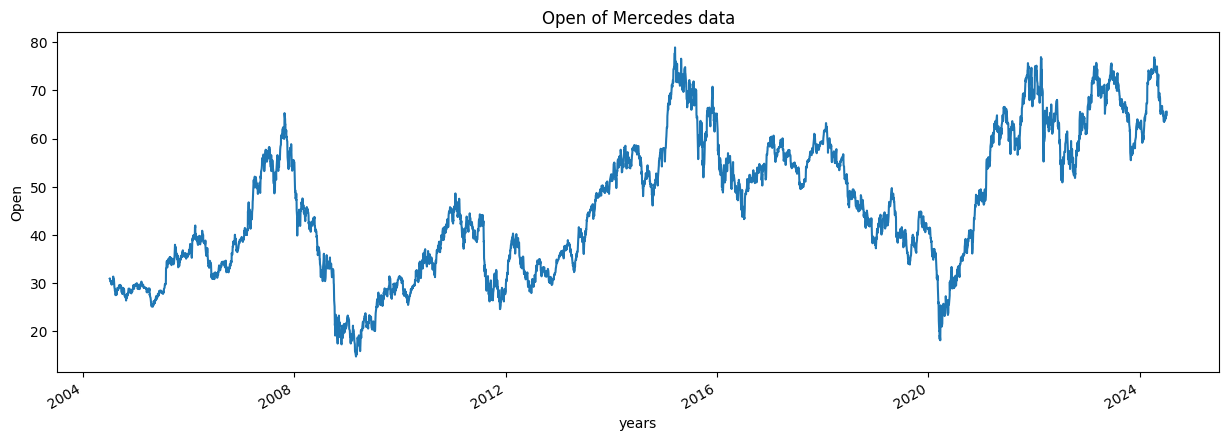

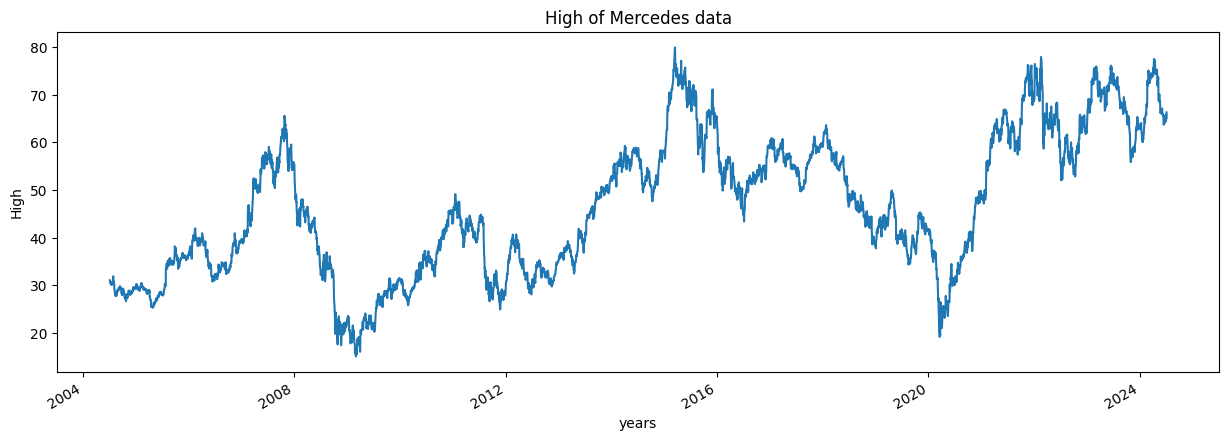

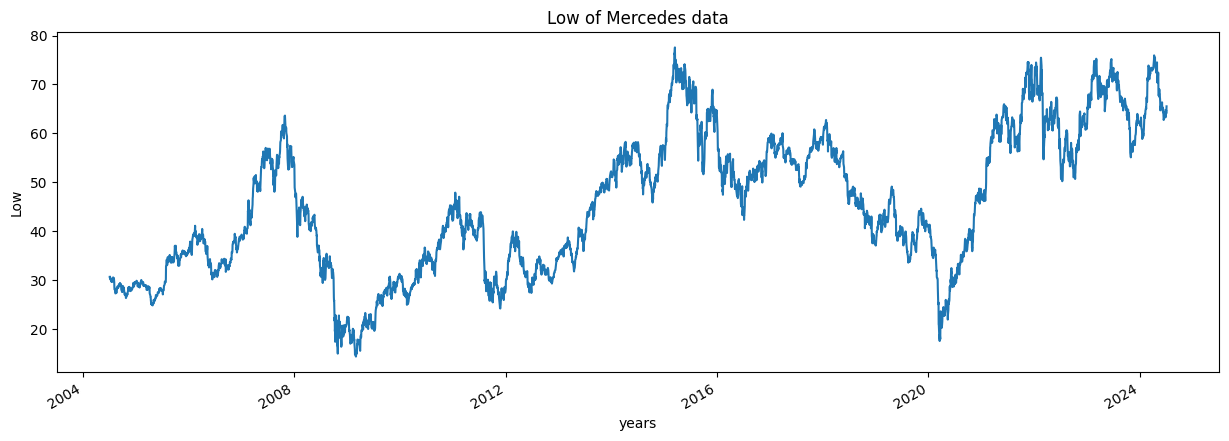

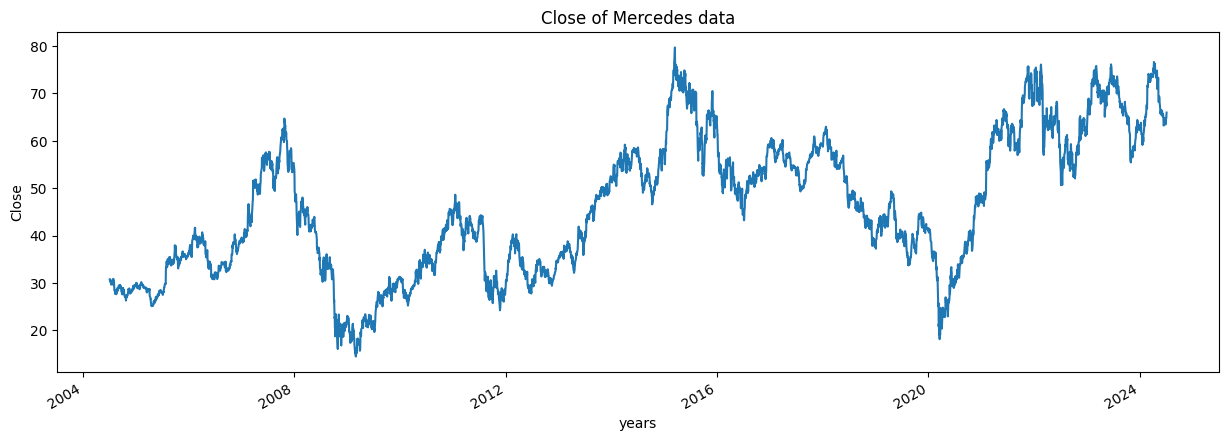

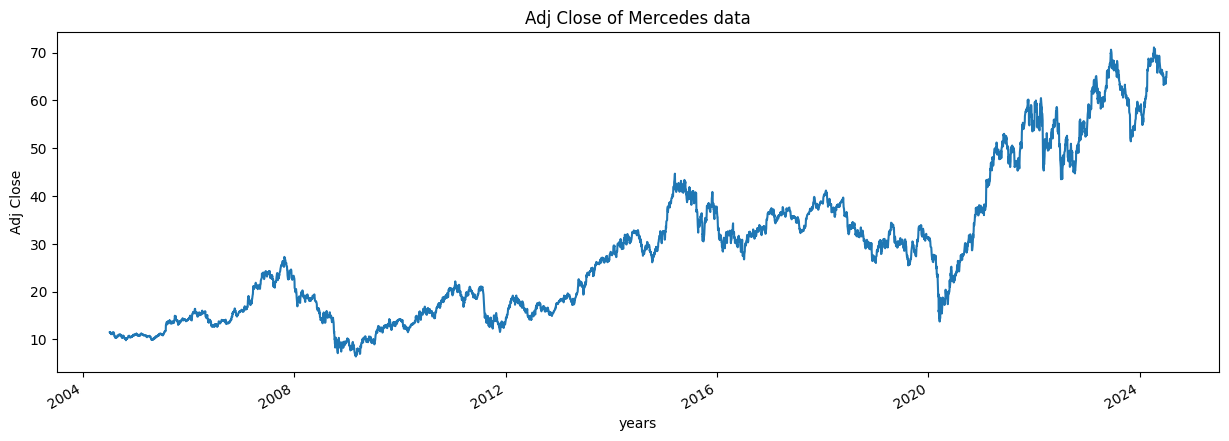

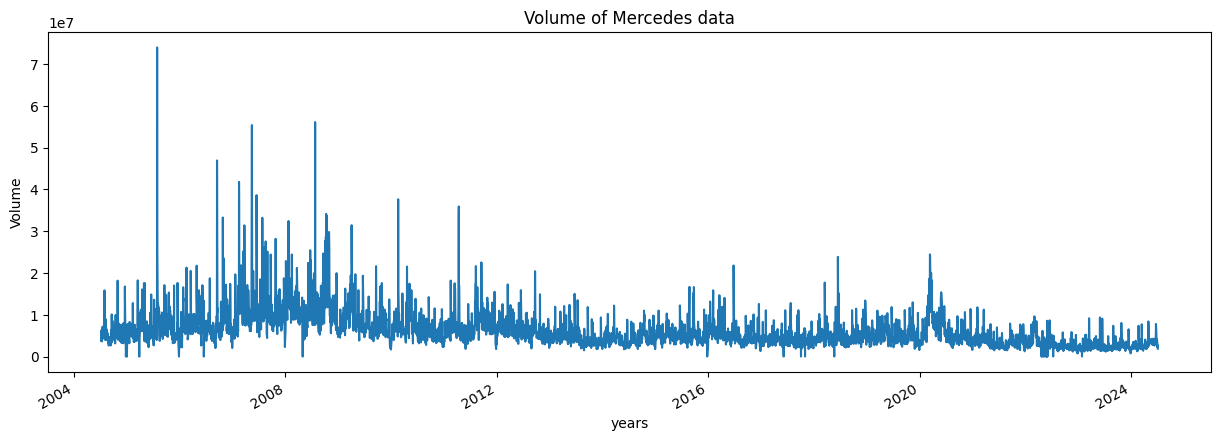

In [15]:
for column in mercedes_data.columns:
    plot_graph((15,5),mercedes_data[column], column)

In [16]:
for i in range(2004,2025):
    print(i,list(mercedes_data.index.year).count(i))

2004 130
2005 260
2006 255
2007 252
2008 254
2009 254
2010 256
2011 256
2012 253
2013 252
2014 252
2015 254
2016 255
2017 255
2018 252
2019 251
2020 254
2021 255
2022 257
2023 255
2024 130


In [22]:
mercedes_data['MA_for_100_days'] = mercedes_data['Adj Close'].rolling(100).mean()
mercedes_data['MA_for_150_days'] = mercedes_data['Adj Close'].rolling(150).mean()
mercedes_data['MA_for_200_days'] = mercedes_data['Adj Close'].rolling(200).mean()
mercedes_data['MA_for_250_days'] = mercedes_data['Adj Close'].rolling(250).mean()


<Figure size 640x480 with 0 Axes>

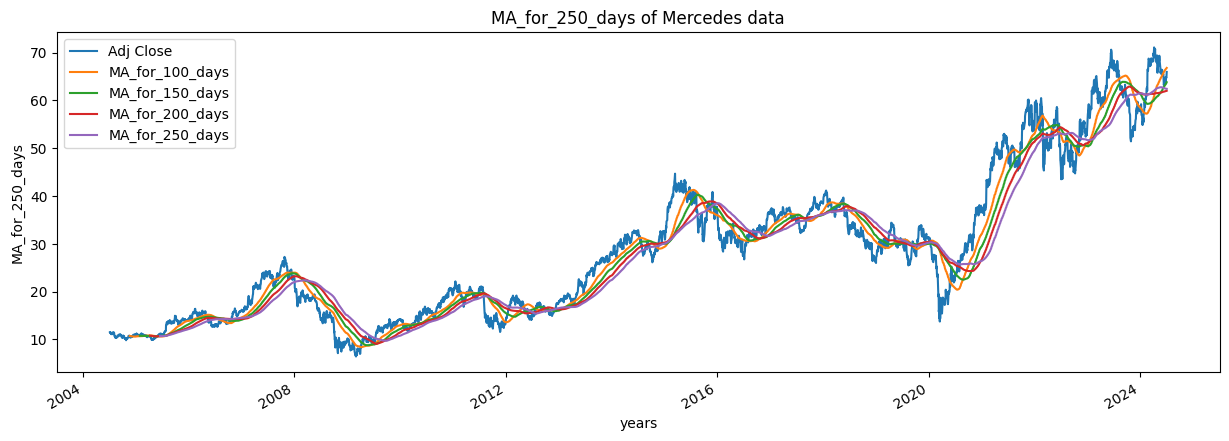

In [23]:
plot_graph((15,5), mercedes_data[['Adj Close','MA_for_100_days','MA_for_150_days','MA_for_200_days','MA_for_250_days']], 'MA_for_250_days')

In [25]:
Adj_close_price = mercedes_data[['Adj Close']]

In [26]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([71.07067108]), array([6.40411091]))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.07815236],
       [0.07704947],
       [0.0775769 ],
       ...,
       [0.90194828],
       [0.91076272],
       [0.92065963]])

In [28]:
len(scaled_data)

5092

In [29]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0],y_data[0]

(array([[0.07815236],
        [0.07704947],
        [0.0775769 ],
        [0.07815236],
        [0.07623425],
        [0.07441204],
        [0.07690559],
        [0.07546705],
        [0.07206238],
        [0.0733571 ],
        [0.07263781],
        [0.0741723 ],
        [0.0767138 ],
        [0.07460386],
        [0.0743641 ],
        [0.07206238],
        [0.07613836],
        [0.0789196 ],
        [0.07887165],
        [0.0789196 ],
        [0.07700149],
        [0.07676173],
        [0.07374072],
        [0.07191851],
        [0.0657806 ],
        [0.06410221],
        [0.0654449 ],
        [0.06280754],
        [0.06055374],
        [0.06088942],
        [0.06323908],
        [0.06280754],
        [0.06247185],
        [0.06026603],
        [0.06055374],
        [0.06323908],
        [0.06381453],
        [0.06448584],
        [0.06765074],
        [0.06765074],
        [0.06587646],
        [0.06467769],
        [0.06678758],
        [0.06702734],
        [0.06899342],
        [0

In [30]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3494, 100, 1)
(3494, 1)
(1498, 100, 1)
(1498, 1)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2024-07-05 11:34:58.474185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 11:34:58.474328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 11:34:58.646181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3494/3494 ━━━━━━━━━━━━━━━━━━━━ 218s 61ms/step - loss: 0.0012
Epoch 2/2
3494/3494 ━━━━━━━━━━━━━━━━━━━━ 216s 62ms/step - loss: 1.6890e-04


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [39]:
predictions = model.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


array([[0.4235258 ],
       [0.4238355 ],
       [0.41747972],
       ...,
       [0.92926437],
       [0.9269366 ],
       [0.93731064]], dtype=float32)

In [40]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[33.79207 ],
       [33.81209 ],
       [33.40109 ],
       ...,
       [66.496445],
       [66.34591 ],
       [67.01677 ]], dtype=float32)

In [41]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[33.19358826],
       [32.74119186],
       [31.92918396],
       ...,
       [64.73000336],
       [65.30000305],
       [65.94000244]])

In [42]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

1.375917384291639

In [44]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = mercedes_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-08-13,33.193588,33.792068
2018-08-14,32.741192,33.812092
2018-08-15,31.929184,33.401089
2018-08-16,32.068382,32.601650
2018-08-17,31.853783,32.750858


<Figure size 640x480 with 0 Axes>

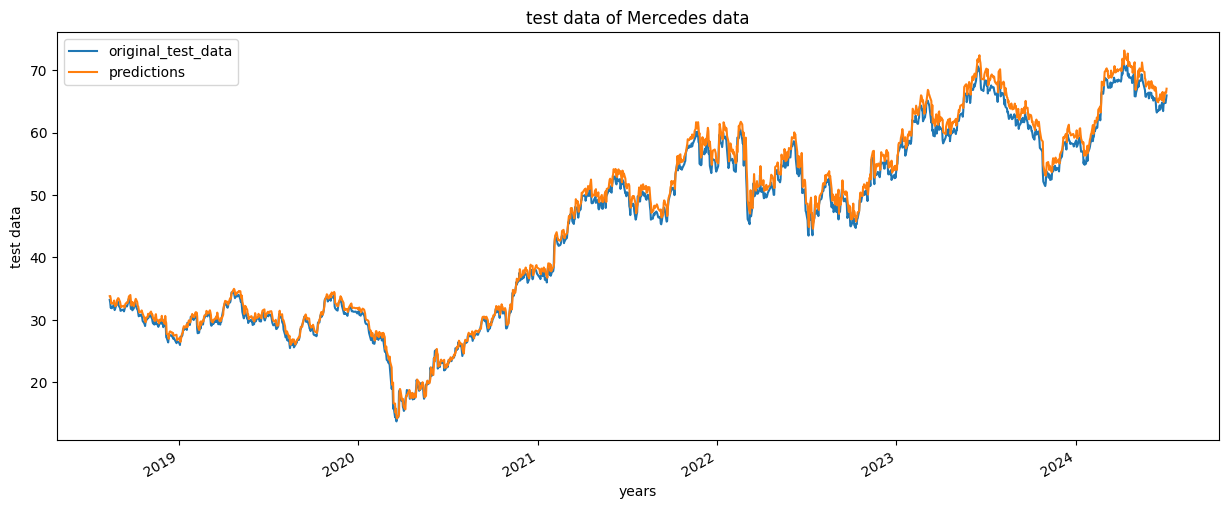

In [45]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

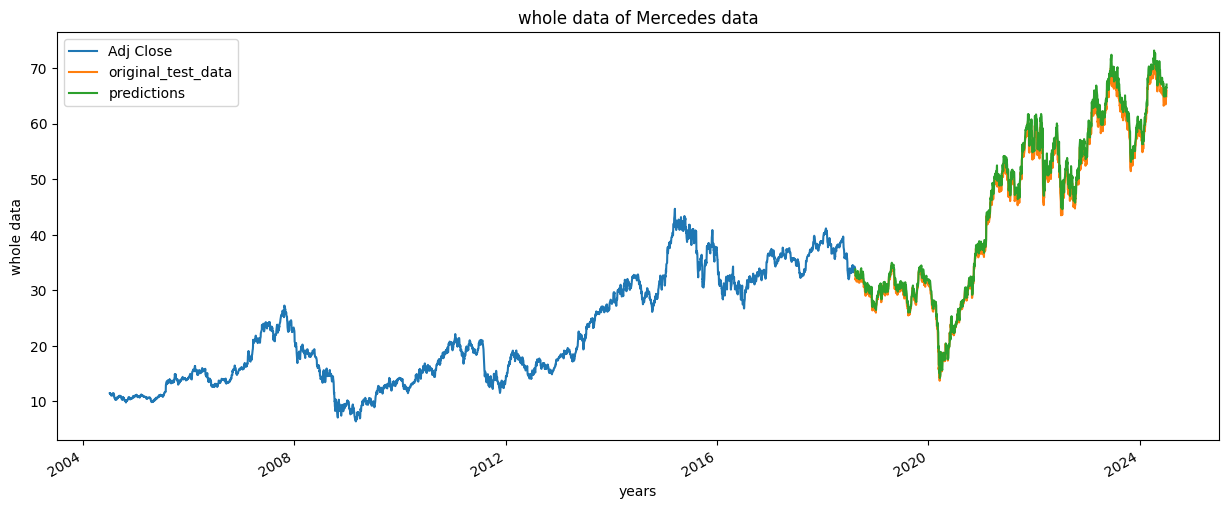

In [46]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [47]:
model.save("Latest_stock_price_model.keras")